TF-Agents - 강하 학습 연구를 위함
TFX - 업계 최고의 머신 러닝 워크플로 관리를 위함
Tensorflow Serving - 제품 배포를 위함
TensorFlow Hub - 사전 훈련된 모델의 저장소인 텐서플로 허브

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [6]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)    # .을 해줘야 하나? 부동 소수점으로 자동 변환해줌
print(x)

tf.Tensor(
[[-1.6288664 ]
 [ 0.47982246]
 [ 0.9225066 ]], shape=(3, 1), dtype=float32)


In [7]:
# 균일 분포(uniform distribution)에서 랜덤한 값들을 생성
# 딥러닝 모델을 초기화하거나 랜덤한 텐서를 생성하는데 유용하게 사용

x = tf.random.uniform(shape=(3,1), minval=0., maxval=1.)
print(x)

넘파이 배열에 값 할당하기

In [10]:
import numpy as np

x = np.ones(shape=(2,2))
x[0, 0] = 0.
x

array([[0., 1.],
       [1., 1.]])

### 텐서 플로와 변수
- 텐서플로에는 직접 값을 할당하는 대신 변수(Variable)를 사용하여 값을 관리함, 이는 텐서플로의 계산 그래프와 자동 미분 기능을 지원하기 위한 설계 선택사항임
- 변수는 텐서플로의 핵심 개념 중 하나로, 그래프 실행 중에 값을 저장하고 업데이트할 수 있는 상태를 나타냄,
- 변수는 초기 값으로 초기화되고, 그 이후에는 값이 변경될 수 있음
- 텐서플로에서는 변수를 사용하여 모델의 가중치, 편향 등의 매개변수를 관리하며, 그렇게 함으로써 모델을 학습하거나 추론하는 과정에서 변수의 값을 최적화할 수 있음
- 변수를 사용하면 텐서플로는 내부적으로 값을 업데이트하기 위해 자동 미분을 사용할 수 있고, 그래프 실행 시 값의 일관성을 유지할 수 있음, 또한, 변수를 사용하면 분산 훈련과 같은 특정 상황에서 값을 공유하거나 관리하기가 편리함
- 따라서, 텐서플로에서는 직접 값을 할당하는 대신 변수를 사용하여 값을 관리하는 것이 권장

In [11]:
# 텐서플로의 즉시 실행 모드는 계산 그래프를 구성하지 않고, 명령을 실행하는 즉시 결과를 반환하는 실행 방식,
# 이 모드에서는 텐서를 직접 조작할 수 있지만, 일부 연산에는 제한이 있을 수 있음
# 즉시 실행모드에서는 텐서를 변경 가능한 객체로 취급하지 않으며, 텐서의 갑을 변경하기 위해서는 변수를 사용해야 함
# 1.x 버전에서는 그래프 실행 모드가 기본 실행 방식이었지만, 2.0부터는 즉시 실행 모드가 도입되어 기본 실행 방식이 되었음
# (계산 그래프를 구성하지 않고, 명령을 실행하는 즉시 결과를 반환하는 방식으ㅗㄹ 더 직관적이고 유연한 프로그래밍 가능케 함)

x = tf.ones(shape=(2, 2))
x[0, 0] = 0.    # 텐서에는 값을 할당할 수 없기 때문에 에러가 발생함

TypeError: ignored

In [12]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.6359146],
       [ 1.1289988],
       [ 0.8549006]], dtype=float32)>


In [13]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [14]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [15]:
v.assign_add(tf.ones((3,1)))    # 3행 1열에 ones 즉 1씩 더함

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [16]:
v.assign_sub(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

## 3.5.2 텐서 연살: 텐서플로에서 수학 계산하기
- 넘파이와 마찬가지로 텐서플로는 수학 공식을 표현하기 위해 많은 텐서 연산을 제공함
- eager execution(즉시 실행) 모드 - 넘파이처럼 언제든지 현재 결괏값을 출력할 수 있음(=연산이 모두 바로 실행된다는 것)

In [25]:
a = tf.ones((2,2))
print(a,'\n')

b = tf.square(a)
print(b, '\n')

c = tf.sqrt(a)
print(c,'\n')

d = b + c
print(d,'\n')

e = tf.matmul(a,b)    # 두 텐서의 행렬곱 (matrix multiplication)
print(e,'\n')

e *= d
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

## 3.5.3 GradientTape API 다시 살펴보기
-  미분 가능한 표현이라면 어떤 입력에 대해서도 그레이디언트를 계산할 수 있음 (<-> numpy)
- GradientTape 블록을 시작하고 하나 또는 여러 입력 텐서에 대해 계산을 수행한 후 입력에 대해 결과의 그레이디언트를 구하면 됨
- GradientTape은 TensorFlow의 핵심 기능 중 하나로, 자동 미분을 수행하기 위해 사용되는 도구입니다.
- TensorFlow는 그래디언트(gradient)를 계산하는 데에 GradientTape을 활용하여 연산 과정을 기록

In [32]:
# TensorFlow를 사용하여 변수 input_var의 제곱에 대한 그레이디언트(기울기)를 계산
# 'result'는 'input_var'의 제곱이므로, 이 미분값을 2 * input_var가 됨, input_var의 초기값이 3이므로, gradient는 6

input_var = tf.Variable(initial_value=3.)

# tf.GradientTape()를 사용하여 GradientTape 컨텍스트를 생성함, 이제부터 tape를 사용하여 연산을 기록할 수 있음
with tf.GradientTape() as tape:
    result = tf.square(input_var)    # tape 컨텍스트 안에 이 연산이 기록됨
gradient = tape.gradient(result, input_var)    # tape.gradient()를 사용하여 result에 대한 input_var의 그레이디언트를 계산
                                               # 첫 번째 인자로 그레이디언트를 계산할 텐서를, 두 번째 인자로 그레이디언트를 계산할 대상 텐서를 받음
gradient    # 제곱 함수의 도함수인 2에 input_var의 초기값인 3을 곱한 값임

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [35]:
# tape.gradient()의 입력 텐서가 텐서플로 변수인 경우
# 그레이디언트를 계산하려면 미분 대상이 되는 텐서가 관찰 대상으로 지정되어야 하는데, TensorFlow 변수는 기본적으로 자동으로 관찰 대상이 됨
# 그러나 상수나 일반 텐서는 그렇지 않기 때문에, 이들에 대해 그레이디언트를 계산하려면 먼저 tape.watch() 함수를 사용하여
# 그 텐서를 관찰 대상으로 지정

input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)    # 여기서 미분하는 것은 상수가 아니라 상수 값을 가진 텐서에 대한 함수
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [ ]:
# 실제로 입력은 어떤 텐서라도 가능하지만, 텐서플로는 기본적으로 훈련 가능한 변수만 추적함
# 상수 텐서의 경우 tape.watch()를 호출하여 추적한다는 것을 수동으로 알려 주어야 함

time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    spend = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)    # 바깥쪽 테이프가 안쪽 테이프의 그레이디언트를 계산함, 계산된 가속도는 4.9*2 = 9.8임

#### 물리학에서 위치, 속도, 그리고 가속도는 서로 미분과 적분을 통해 연결
- 위치(position)는 시간에 대해 미분하면 속도(velocity)가 된다. 이는 위치가 시간에 따라 어떻게 변하는지를 나타내며, 이 변화율이 바로 속도이다. 즉, 위치의 그레디언트(미분값)는 속도이다.
- 속도를 시간에 대해 미분하면 가속도(acceleration)가 된다. 속도가 시간에 따라 어떻게 변하는지를 나타내며, 이 변화율이 바로 가속도이다. 즉, 속도의 그레디언트(미분값)는 가속도이다.
- 따라서, 위치의 두 번째 시간에 대한 미분값(이계도 그레디언트)은 가속도가 된다.

#### 그레이디언트 테이프를 중첩하여 이계도 그레이디언트를 계산하기
- TensorFlow를 사용하여 시간(time)에 따른 위치(position)와 속도(speed)의 변화를 모델링하고, 그에 대한 가속도(acceleration)를 계산하는 예시
- 첫 번째 줄에서는 TensorFlow 변수 time을 생성하고, 초기값을 0.0으로 설정.
- 두 번째 줄에서는 tf.GradientTape()를 사용하여 outer_tape라는 GradientTape 컨텍스트를 생성합니다. outer_tape를 사용하여 가속도에 대한 그래디언트를 계산.
- 세 번째 줄에서는 inner_tape라는 또 다른 GradientTape 컨텍스트를 생성합니다. inner_tape를 사용하여 위치에 대한 그래디언트를 계산.
- 네 번째 줄에서는 position 변수에 4.9 * time ** 2의 연산 결과를 할당합니다. 이 때, 이 연산은 inner_tape 컨텍스트 내에서 기록.
- 다섯 번째 줄에서는 inner_tape.gradient()를 사용하여 position에 대한 time의 그래디언트를 계산합니다. 이를 통해 위치에 대한 시간의 변화율, 즉 속도를 구한다.
- 여섯 번째 줄에서는 outer_tape.gradient()를 사용하여 speed에 대한 time의 그래디언트를 계산합니다. 이를 통해 속도에 대한 시간의 변화율, 즉 가속도를 구한다.

따라서 acceleration에는 time에 대한 speed의 그래디언트가 저장된다.
결과적으로, 이 코드는 시간에 따른 위치를 모델링하고, 이를 기반으로 속도와 가속도를 계산한다. time 변수의 값이 변할 때 위치, 속도 및 가속도의 변화율을 계산하여 모델을 업데이트할 수 있다.

## 3.5.4 엔드-투-엔드 예제: 텐서플로 선형 분류기

In [39]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [40]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [41]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype='float32'),
                     np.ones((num_samples_per_class, 1), dtype='float32')))

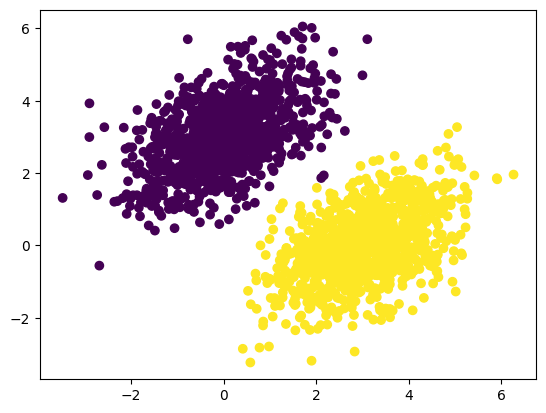

In [43]:
import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [45]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))   # 2행 1열??
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [52]:
# 정방향 패스를 위한 함수 (심플하게 말하면 연산 함수임???)
# 이 선형 분류기를 2D 입력을 다루기 때문에 W는 2개의 스칼라 가중치 w1과 w2로 이주어짐 (W = [[w1], [w2]])
# 반면 b는 하나의 스칼라 값임
def model(inputs):
    return tf.matmul(inputs, W) + b    # 이게 선형 변환하는 것임???

In [47]:
# 평군 제곱 오차 손실 함수

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)    # per_sample_losses는 targets나 predictions와 크기가 같은 텐서이며 각 샘플의 손실 값을 담고 있음
    return tf.reduce_mean(per_sample_losses)    # 샘플당 손실 값을 하나의 스칼라 손실 값으로 평균함, reduce_mean 함수가 이런 작업을 수행함
                                                # (샘플 개수로 나누어 주는 것 의미함??)

In [54]:
# 훈련 스텝 함수 - 훈련 데이터를 받아 이 데이터에 대한 손실을 최소화하도록 가중치 W와 b를 업데이트함

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:    # 그레이디언트 테이프 블록 안의 정방향 패스
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])    # 가중치에 대한 손실의 그레이디언트를 구함
    W.assign_sub(grad_loss_wrt_W * learning_rate)    # 가중치를 업데이트 함
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [55]:
# 구현을 간단하게 하기 위해 미니 배치 훈련 대신 배치 훈련을 사용, 즉 데이터를 작은 배치로 나누어 반복하지 않고 전체 데이터를 사용하여
# 훈련 스텝(그레이디언트 계산과 가중치 업데이트)을 실행,
# 128p 내용 참고 -> 결과적으로 훈련 스텝의 횟수가 많이 필요하지 않고 미니 배치 훈련 때보다 일반적으로 큰 학습률을 사용할 수 있음
for step in range(40):
    loss = training_step(inputs, targets)
    print(f'{step}번째 스텝의 손실: {loss:.4f}')

0번째 스텝의 손실: 0.1174
1번째 스텝의 손실: 0.0781
2번째 스텝의 손실: 0.0693
3번째 스텝의 손실: 0.0650
4번째 스텝의 손실: 0.0615
5번째 스텝의 손실: 0.0584
6번째 스텝의 손실: 0.0556
7번째 스텝의 손실: 0.0530
8번째 스텝의 손실: 0.0506
9번째 스텝의 손실: 0.0484
10번째 스텝의 손실: 0.0464
11번째 스텝의 손실: 0.0446
12번째 스텝의 손실: 0.0429
13번째 스텝의 손실: 0.0414
14번째 스텝의 손실: 0.0400
15번째 스텝의 손실: 0.0387
16번째 스텝의 손실: 0.0375
17번째 스텝의 손실: 0.0364
18번째 스텝의 손실: 0.0354
19번째 스텝의 손실: 0.0345
20번째 스텝의 손실: 0.0336
21번째 스텝의 손실: 0.0328
22번째 스텝의 손실: 0.0321
23번째 스텝의 손실: 0.0315
24번째 스텝의 손실: 0.0309
25번째 스텝의 손실: 0.0303
26번째 스텝의 손실: 0.0298
27번째 스텝의 손실: 0.0294
28번째 스텝의 손실: 0.0290
29번째 스텝의 손실: 0.0286
30번째 스텝의 손실: 0.0282
31번째 스텝의 손실: 0.0279
32번째 스텝의 손실: 0.0276
33번째 스텝의 손실: 0.0273
34번째 스텝의 손실: 0.0271
35번째 스텝의 손실: 0.0268
36번째 스텝의 손실: 0.0266
37번째 스텝의 손실: 0.0264
38번째 스텝의 손실: 0.0263
39번째 스텝의 손실: 0.0261


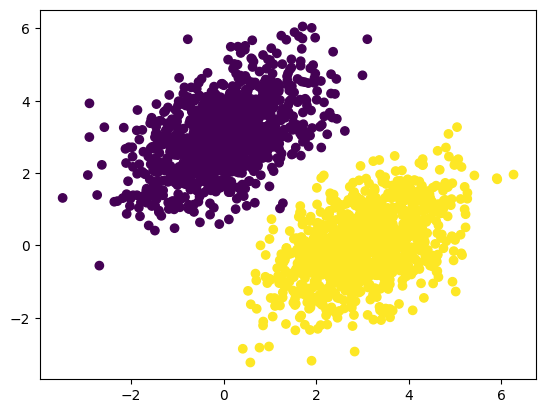

In [56]:
# 타깃이 0 또는 1이기 때문에 입력 포인트의 예측 값이 0.5보다 작으면 '0'으로 분류되고, 0.5보다 크면 '1'로 분류됨

predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

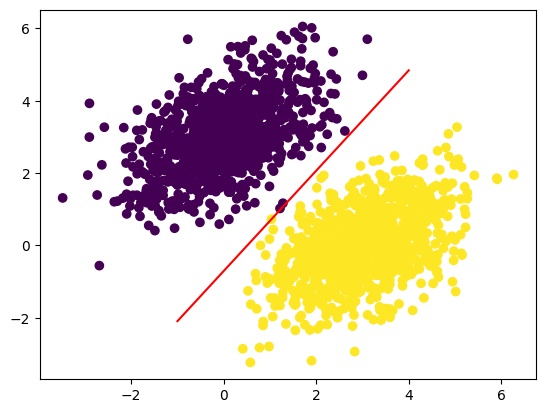

In [57]:
# 이것이 선형 분류기에 대한 전부임, 데이터에 있는 두 클래스를 잘 구분하는 직선(또는 고차원 공간의 경우 초평면)의 파라미터를 찾는 것
# 심플하게 선형변환만 해줌(활성화 함수는 안쓰고)

x = np.linspace(-1, 4, 100)    # 직선을 그리기 위해 -1~4 사이에 일정한 간격을 가진 100개의 숫자를 생헝함
y = - W[0] / W[1] * x + (0.5 - b) / W[1]    # 사용할 직선의 방정식
plt.plot(x, y, '-r')    # 직선을 그립니다('-r'은 빨간색을 의미함)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)    # 동일한 그래프의 모델의 예측을 나타냄
plt.show()

## 3.6 신경망의 구조: 핵심 Keras API 이해하기
### 3.6.1 층: 딥러닝의 구성 요소
#### layer와 weight
- 신경망의 기본 데이터 구조, 하나 이상의 텐서를 입력으로 받고 하나 이상의 텐서를 출력하는 데이터 처리 모듈
- 대부분의 경우 가중치라는 층의 상태를 가짐
- 가중치 - 확률적 경사 하강법으로 학습되는 하나 이상의 텐서이며 여기에 신경망이 학습한 지식이 담겨 있음
#### 층의 종류 (층마다 적절한 텐서 포맷과 테이터 처리 방식이 다름)
- 밀집 연결 층, 완전 연결 층, 밀집 층 - 랭크-2 텐서에 저장된 간단한 벡터 데이터 처리
- LSTM같은 순환 층, 1D 합성곱 층(Conv1D) - 랭크-3 텐서에 저장된 시퀀스 데이터(samples, timesteps, features)
- 2D 합성곱 층(Conv2D) - 랭크-4 텐서에 저장된 이미지 데이터
#### 케라스의 Layer 클래스
- 케라스에서는 Layer 또는 Layer와 밀접하게 상호 작용하는 것이 전부임
- 상태(가중치)와 연산(정방향 패스)을 캡슐화한 객체
가중치는 (생성자인 __init() 메서드에서 만들 수도 있지만) 일반적으로 build() 메서드에서 정의하고 연산은 call() 메서드에서 정의함
- 이전 장에서 2개의 W와 b를 가지고 output = activation(dot(input, W) + b) 계산을 수행하는 NaiveDense 클래스를 정의했음, 이와 동일한 케라스 층임



### 아래 함수에 대한 설명
#### units
- 층에 있는 뉴런의 개수가 32개라는 의미임
- 각 뉴런은 입력 데이터와 가중치를 곱하고 편향을 더한 뒤, 활성화 함수를 적용하여 출력을 계산함, 이러한 계산이 32개의 독립적인 뉴런에서 동시에 수행됨
- 따라서 32개의 유닛을 가진 층은 입력 데이터에 대해 32차원의 출력을 생성하는데, 이는 각 유닛이 32개의 독립적인 값을 출력한다는 의미임
- 이렇게 층의 유닛 수가 많을수록 층은 더 많은 특성을 학습하고 표현할 수 있음<br><br>
#### 가중치
- 입력 특성과 출력 특성은 다를 수 있음
- 입력은 층에 들어오는 데이터의 특성을 나타내고, 출력은 츠잉 생성하는 결과의 특성을 나타내기 때문임
- 일반적으로 인공 신경망의 층은 입력과 출력의 크기에 따라 가중치의 크기가 결정됨
- 가중치는 입력 특성의 개수와 출력 특성의 개수에 따라 형성되며, 이는 층의 구조와 매개변수의 개수를 결정짓는 중요한 요소임
- input_dim은 입력 특성의 개수 / self.units는 출력 특성의 개수임 -> 가중치의 행렬이 됨
- 출력 특성의 개수는 units 매개변수에 지정된 값임
- 이렇게 함으로써 입력과 출력의 크기에 따라 적절한 크기의 가중치 행렬을 생성할 수 있음
- 이 가중치 행렬은 입력과 출력의 차원을 맞추어 행렬 곱셈 연산을 수행할 수 있도록 함
- <font color=red>self.W는 (784,32)의 행렬이 됨?</font>
- 입력 (2X784)와 weight (784, 32)의 행렬 곱 => (2, 32)
- slef.b의 shape가 self.units인 이유는 각 유닛에 대한 편향 값을 독립적으로 설정하기 위함임, 층의 출력에 더해지는 상수 값임<br><br>
#### 활성화 함수
- 활성화 함수는 인공 신경망에서 비선형성을 도입하기 위해 사용됩니다. 비선형성은 신경망의 표현력을 증가시키고, 복잡한 함수를 모델링할 수 있는 능력을 제공합니다. 따라서 활성화 함수를 사용함으로써 신경망은 다양한 종류의 함수를 학습할 수 있습니다.

- 선형 변환인 가중치와 편향의 조합만으로는 복잡한 함수를 표현하는 데 제약이 있습니다. 예를 들어, 선형 변환만으로는 층을 여러 개 쌓아도 여전히 선형 연산이므로 표현력이 제한됩니다. 이를 해결하기 위해 비선형성을 추가하여 다양한 패턴을 모델링할 수 있게 됩니다.

- 주로 사용되는 활성화 함수 중 하나인 ReLU(Rectified Linear Unit) 함수는 입력값이 0보다 작으면 0을 출력하고, 0보다 크면 입력값을 그대로 출력하는 함수입니다. 이 함수는 입력이 양수일 때는 선형 변환을 유지하고 음수일 때는 비선형성을 부여하여 복잡한 패턴을 학습할 수 있게 합니다.

- 따라서 활성화 함수를 사용하여 비선형성을 도입하면 신경망이 더 복잡한 함수를 모델링할 수 있으며, 이는 다양한 데이터 패턴을 학습하는 데 도움을 줍니다.


In [60]:
# keras.layers.Layer는 TensorFlow Keras의 기본 클래스인 Layer 클래스입니다.
# Layer 클래스는 신경망의 층(layer)을 구성하는 데 사용되는 기본 클래스로, 사용자 정의 층을 만들 때 상속받아 사용합니다.
# Layer 클래스를 상속받은 사용자 정의 층을 만들면, 해당 층의 동작과 구조를 정의할 수 있습니다.
# 위의 코드에서 SimpleDense 클래스는 keras.layers.Layer를 상속받아 사용자 정의 층을 만들고 있습니다.
# SimpleDense 클래스는 Layer 클래스의 __init__, build, call 메서드를 오버라이딩하여 층의 동작을 정의하고 있습니다.
# __init__ 메서드: 층의 생성자로, 층의 속성을 초기화합니다. units는 해당 층의 출력 크기를 의미하며, activation은 적용할 활성화 함수를 나타냅니다.
# build 메서드: 층의 가중치를 생성하는 메서드로, 층의 입력 형태에 기반하여 가중치를 초기화합니다.
# 입력 형태인 input_shape을 받아 적절한 크기의 가중치 W와 편향 b를 생성합니다.
# call 메서드: 층의 정방향 패스 계산을 수행하는 메서드로, 입력 데이터 inputs를 받아 층의 출력을 계산합니다.
# 이 예시에서는 입력 데이터와 가중치 W의 행렬곱에 편향 b를 더한 값을 계산합니다. 활성화 함수가 지정된 경우에는 출력에 활성화 함수를 적용합니다.
# keras.layers.Layer를 상속받아 사용자 정의 층을 만들면, 층의 동작과 구조를 유연하게 정의할 수 있습니다.

from tensorflow import keras

class SimpleDense(keras.layers.Layer):    # 모든 케라스 층은 Layer 클래스를 상속함
    def __init__(self, units, activation=None):
        super().__init__()    # SimpleDense 클래스의 부모 클래스인 keras.layers.Layer의 생성자를 호출하는 역할을 함
        self.units = units
        self.activation = activation

    def build(self, input_shape):    # build() 메서드에서 가중치를 생성함
        input_dim = input_shape[-1]    # 입력 텐서의 마지막 차원의 크기를 나타냄 (batch_size, input_dim) 튜플 형식에서 input_dim 선택하기 위함
        self.W = self.add_weight(shape=(input_dim, self.units),    # add_weight()는 가중치를 간편하게 만들 수 있는 메서드임,
                                 initializer='random_normal')      # self.W = tf.Variable(tf.random.uniform(w_shape))와 같이 독립적으로 변수를 생성하고
         self.b = self.add_weight(shape=(self.units,),             # 층의 속성으로 할당할 수도 있음
                                 initializer='zeros')              # initializer는 가중치와 편향과 같은 모델의 매개변수를 초기화하는 데
                                                                   # 사용되는 방법을 지정하는 인수임


    def call(self, inputs):    # call() 메서드에서 정방향 패스 계산을 정의함, relu(Wx + b) 행렬곱 -> relu라는 활성화 함수에 대입해주는 것임
        y = tf.matmul(inputs, self.W) + self.b    # 선형변환 수행
        if self.activation is not None:
            y = self.activation(y)    # 수행한 결과인 y에 대해 activation 함수를 적용함 (=선형 변환 결과에 비선형성을 추가하는 것임)
        return y

아래 코드에서 activation=tf.nn.relu로 설정된 경우, my_dense 층의 출력에 ReLU 활성화 함수가 적용됩니다. 이는 y = tf.nn.relu(y)와 같이 층의 출력 y에 ReLU 함수를 적용하는 것을 의미합니다.

활성화 함수를 사용하는 이유는 모델이 비선형성을 학습하고 다양한 패턴과 복잡한 관계를 표현할 수 있도록 하기 위함입니다. ReLU는 비선형성을 갖는 활성화 함수로서, 신경망 모델의 표현력을 향상시키고, 그래디언트 소실 문제를 완화하며, 계산 효율성을 높이는 데 도움을 줍니다.

In [61]:
# my_dense라는 객체 생성 -> 입력 텐서를 my_dense 층에 적용하여 출력 텐서를 얻음

my_dense = SimpleDense(units=32, activation=tf.nn.relu)    # 앞서 정의한 층의 인스턴스를 만듦, 32개의 유닛을 가진 밀집층임 (층의 출력 크기임)
                                                           # 활성화 함수는 인공 신경망의 각 뉴런에 적용되어 입력 신호를 변환하여 층의 출력을 결정하는 역할을 함
                                                           # ReLu 함수는 주로 인공 신경망에서 사용되는 활서오하 함수 중 하나로, 입력값이 0보다 작으면 0을 출력하고,
                                                           # 0보다 크면 입력값을 그대로 출력함,
                                                           # 즉 음수 입력에 대해 비선형을 부여하고, 양수 입력은 그 값을 그대로 전달함
input_tensor = tf.ones(shape=(2, 784))    # 테스트 입력을 만듦, 배치 크기는 입력 텐서를 생성할 때 지정됨, 각 샘플은 784개의 원소를 가지는 벡터임
                                          # 배치 크기는 입력 데이터의 행(row)수를 나타냄,
                                          # 딥러닝에서 데이터를 처리할 때 일반적으로 여러 개의 샘플을 함께 처리하는 것이 효율적임
                                          # 배치 크기는 한 번에 처리할 샘플의 개수를 나타냄
                                          # 784개의 특성(feature)을 가진 샘플 2개임

output_tensor = my_dense(input_tensor)    # 이 입력으로 층을 함수처럼 호출함
print(output_tensor.shape)    # 해당 층의 출력 텐서는 배치 크기 2(배치 크기 차원)와 32개의 원소로 구성된 벡터임
                              # 출력 텐서는 배치 크기가 2인 샘플들에 대해 각각 32개의 값을 가지는 벡터를 출력함

# 결론적으로  units=32로 설정된 층은 출력 텐서의 크기가 (2,32)이며, 이는 2개의 샘플에 대해 각각 32개의 원소를 가지는 벡터로 구성되어 있음을 나타냄

(2, 32)


In [62]:
input_tensor

<tf.Tensor: shape=(2, 784), dtype=float32, numpy=
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)>

In [63]:
output_tensor

<tf.Tensor: shape=(2, 32), dtype=float32, numpy=
array([[2.298789  , 0.        , 1.5337532 , 0.        , 0.9522568 ,
        0.55417085, 0.9405234 , 0.        , 1.1867454 , 0.        ,
        0.        , 0.        , 2.435276  , 0.        , 2.4678004 ,
        0.        , 0.8144486 , 0.        , 0.59200937, 1.3519495 ,
        0.        , 0.74741924, 0.6169916 , 0.41986385, 0.57587755,
        0.        , 0.7667913 , 1.4176599 , 0.05771638, 1.0382714 ,
        1.3831081 , 0.05006187],
       [2.298789  , 0.        , 1.5337532 , 0.        , 0.9522568 ,
        0.55417085, 0.9405234 , 0.        , 1.1867454 , 0.        ,
        0.        , 0.        , 2.435276  , 0.        , 2.4678004 ,
        0.        , 0.8144486 , 0.        , 0.59200937, 1.3519495 ,
        0.        , 0.74741924, 0.6169916 , 0.41986385, 0.57587755,
        0.        , 0.7667913 , 1.4176599 , 0.05771638, 1.0382714 ,
        1.3831081 , 0.05006187]], dtype=float32)>

#### 자동 크기 추론: 동적으로 층 만들기
- 레고 블록처럼 호환되는 층만 서로 연결할 수 있음
- 층 호환(layer compatibility) 개념은 모든 층이 특정 크기의 입력 텐서만 받고, 특정 크기의 출력 텐서만 반환한다는 사실을 의미함

In [ ]:
# 이 층은 첫 번째 차원이 32인 텐서를 반환함, 입력으로 32차원의 벡터를 기대하는 후속 층에만 연결할 수 있음
from tansorflow.keras import layers
layer = layers.Dense(32, activation='relu')

In [64]:
# 케라스를 사용할 때 대부분의 크기 호환성에 대해 걱정할 필요가 없음, 모델에 추가하는 층은 앞선 층의 크기에 맞도록 동적으로 만들어지기 때문임
# 예를 들어 다음과 같은 경우임
# 이 층들은 입력 크기에 대해 어떤 정보도 받지 않음, 그 대신 입력 크기를 처음 본 입력의 크기로 추론함
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32)
])

In [ ]:
# 2장에서 만들었던 간단한 Dense 층인 NaiveDense 클래스의 경우 가중치를 만들기 위해 각 층의 입력 크기를 생성자에게 명시적으로 전달했음
# 이는 이상적이지 않음, 예를 들어 층이 이전 층의 크기를 알도록 하기 위해 다음과 같은 모델이 만들어지기 때문임
model = NaiveSequential([
    NaiveDense(input_size=784, output_size=32, zctivation='relu'),
    NaiveDense(input_size=32, output_size=64, zctivation='relu'),
    NaiveDense(input_size=64, output_size=32, zctivation='relu'),
    NaiveDense(input_size=32, output_size=10, zctivation='softmax')
])

In [ ]:
# 출력을 만드는 층이 규칙이 복잡하면 문제는 더 심각해짐, 예를 들어 층이 (batch, imput_size *2 if input_size % 2 == 0 else input_size * 3) 크기의
# 출력을 반환한다면 어떻게 될까?
# 크기를 자동으로 추론할 수 있는 케라스 층으로 NaiveDense 클래스를 다시 구현한다면 이전에 보았던 build()와 call() 메서드가 있는 SimpleDense 층(코드 3-2)과 같을 것임
# SimpleDense 클래스에서는 NaiveDense처럼 생성자에게 가중치를 만들지 않음,그 대신 상태 생성을 위한 전용 메서드인 build()를 만듦
# 이 메서드는 층이 처음 본 입력 크기를 매개변수로 받음, build() 매서드는 층이 처음 호출될 때 (__call_() 메서드를 통해) 자동으로 호출됨
# 사실 이것이 __call__() 메서드가 아니라 별도의 call() 메서드에게 계산을 정의한 이유임
# 기본 Layer 클래스의 __call__() 메서드는 다음과 같음

def __call__(self, inputs):
    if not self.built:
        self.build(inputs.shape)
        self.built = True
    return self.call(inputs)

In [ ]:
# 자동으로 크기를 추천하면 이전 예시는 다음과 같이 간단하고 깔끔하게 표현할 수 있음
model = keras.Sequential([
    SimpleDense(32, activation='relu'),
    SimpleDense(64, activation='relu'),
    SimpleDense(32, activation='relu'),
    SimpleDense(10, activation='softmax')
])

### 3.6.2 층에서 모델로

### 3.6.3 '컴파일' 단계: 학습 과정 설정 (학습 방식 지정해 주는 단계)